<a href="https://colab.research.google.com/github/jgait/DSPS_WGaither/blob/main/HW2/HW2_MBoltzmannDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS, Completed by Zach Mckennedy

In [ ]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution). The parameter that controls the shape of a Chi distribution is called "degrees of freedom" and the Maxwel-Boltzmann distribution is a Chi2 distribution _with 3 degrees of freedom_, and with a scale parameter _a_ corresponding to the temperature in some way.


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

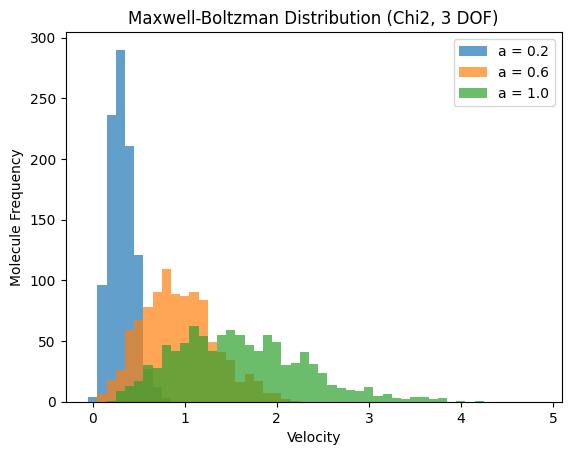

In [ ]:
def gen_chi2():
  np.random.randn(123)
  fig, ax = pl.subplots()
  for a in [0.2, 0.6, 1.0]:
      ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
            bins=np.arange(0,5,0.1)-0.05, alpha=0.7,
        label="a = %.1f"%a);

  pl.legend();

  # your code to add labels here
  pl.title("Maxwell-Boltzman Distribution (Chi2, 3 DOF)")
  pl.ylabel("Molecule Frequency")
  pl.xlabel("Velocity")

# Made this a function to reuse later in this notebook.
gen_chi2()

This plot is meant to show a Chi2 distribution with 3 degrees of freedom. Each of the individual distributions use a different scaling factor, which in the Maxwell-Boltzman distribution represent a scaling factor due to temperature that seems to ajust the spread of the entire distribution.

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**?

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)


2) Answer: Since the equation for the Maxwell-Boltzman distribution is $f(v)=\sqrt[]{\frac{2}{\pi}}(\frac{m}{\alpha T})^{3/2}v^{2}e^{-\frac{m v^{2}}{2kT}}$, we can see that alpha is proportional to just $\sqrt[]{T}$. So the answer would be: $a \propto \sqrt{T}$


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed?
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()``` to  calculate the gamma $\Gamma$ function, and the definition of the mean from the [wikipwdia page of the Chi2 distribution](https://en.wikipedia.org/wiki/Chi_distribution)
**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**
(and does it look right based on the plots above?)

The mean when alpha = 0.2 is 0.32
The mean when alpha = 0.6 is 0.96
The mean when alpha = 1.0 is 1.60


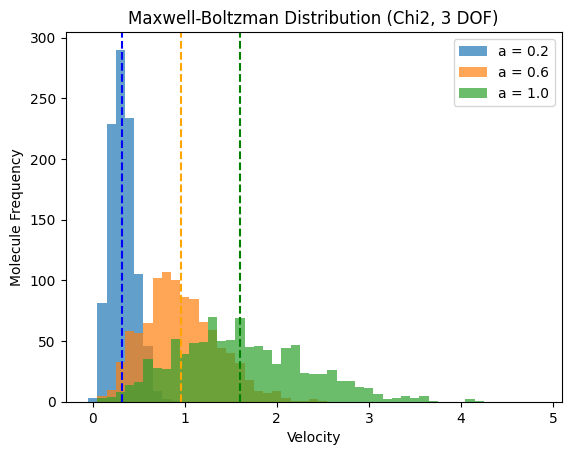

In [ ]:
# your code here

gen_chi2()

DOF = 3

# Calculated on seperate lines for cleanliness.
numerator = sp.special.gamma((DOF + 1)/2)
denom = sp.special.gamma(DOF/2)

# Calculates the mean
mean = np.sqrt(2) * numerator / denom

alpha = [(0.2, 'blue'), (0.6, 'orange'), (1.0, 'green')]

# Scale the mean to the given alpha values
for a in alpha:
  scaled_mean = a[0]*mean
  pl.axvline(scaled_mean, color=a[1], linestyle='dashed')
  print(f'The mean when alpha = {a[0]} is {scaled_mean:0.2f}')


Here we calculate the means of the three differently scaled distributions using: $\mu ={\sqrt  {2}}\,{\frac  {\Gamma ((k+1)/2)}{\Gamma (k/2)}}$ and plot their means as dashed vertical lines in their respective colors. The means seem to make perfect sense in this situation and line up roughly in the center of the distributions.

This really only holds for perfect gasses, which means under 4 assumptions:
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)
